<a href="https://colab.research.google.com/github/mpiabenitez/Proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: armae un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Biología', 'Física', 'Química', 'Educación Física', 'Inglés', 'Arte', 'Música', 'Tecnología', 'Ciudadanía']

# Función para generar un nombre aleatorio
def generar_nombre():
    nombres = ['Juan', 'Pedro', 'Maria', 'Ana', 'Sofia', 'Lucas', 'Mateo', 'Martina', 'Emma', 'Benjamín']
    apellidos = ['Gómez', 'Rodríguez', 'Pérez', 'López', 'García', 'Martínez', 'González', 'Díaz', 'Sánchez', 'Romero']
    return f"{random.choice(nombres)} {random.choice(apellidos)}"

# Crear un DataFrame vacío
df = pd.DataFrame(columns=['Apellido y Nombre', 'Nro_DNI', 'Materia Escolar', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Generar 100 filas de datos aleatorios
for i in range(100):
    nombre = generar_nombre()
    dni = np.random.randint(10000000, 99999999)  # DNI aleatorio de 8 dígitos
    materia = random.choice(materias)
    nota1 = np.random.randint(1, 11)
    nota2 = np.random.randint(1, 11)
    nota3 = np.random.randint(1, 11)
    faltas = np.random.randint(0, 20)

    nueva_fila = pd.DataFrame({
        'Apellido y Nombre': [nombre],
        'Nro_DNI': [dni],
        'Materia Escolar': [materia],
        'Nota 1er Trimestre': [nota1],
        'Nota 2do Trimestre': [nota2],
        'Nota 3er Trimestre': [nota3],
        'Faltas a clases': [faltas]
    })

    df = pd.concat([df, nueva_fila], ignore_index=True)

# Mostrar las primeras 5 filas del DataFrame
print(df.head())

   Apellido y Nombre   Nro_DNI Materia Escolar Nota 1er Trimestre  \
0        Juan García  57756479        Historia                  9   
1      Mateo Sánchez  16292518            Arte                  9   
2  Martina Rodríguez  72132760        Historia                  1   
3      Juan González  58766345       Geografía                  3   
4         Sofia Díaz  35153646            Arte                  6   

  Nota 2do Trimestre Nota 3er Trimestre Faltas a clases  
0                  7                  5               9  
1                  1                  7              11  
2                  4                  9               3  
3                  9                  2              14  
4                  2                  8               7  


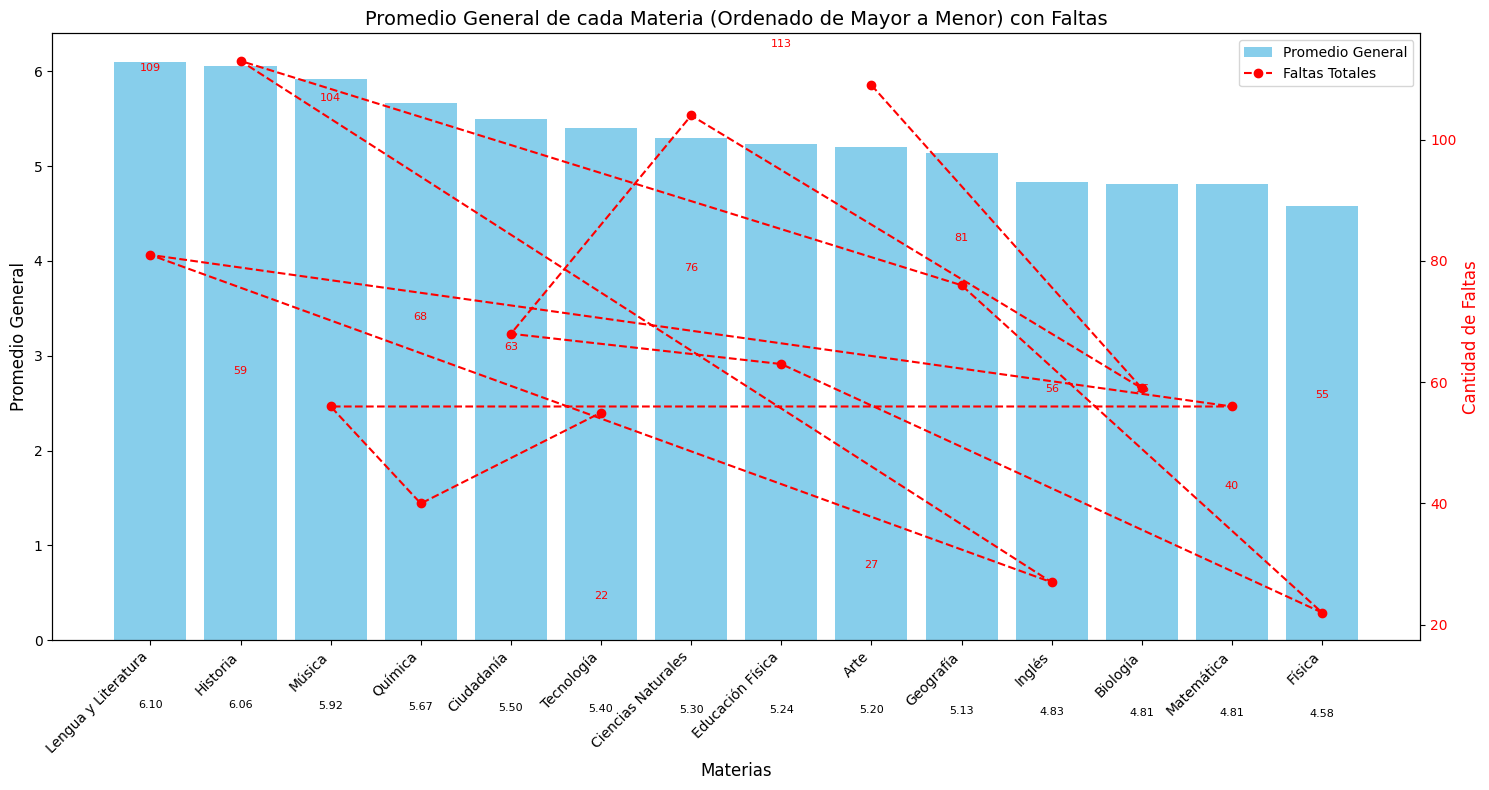

In [4]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio de cada materia
promedios_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedios_ordenados = promedios_materias.sort_values(ascending=False)

# Obtener las faltas totales por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
ax1 = plt.bar(promedios_ordenados.index, promedios_ordenados.values, color='skyblue')
plt.xlabel('Materias', fontsize=12)
plt.ylabel('Promedio General', fontsize=12)
plt.title('Promedio General de cada Materia (Ordenado de Mayor a Menor) con Faltas', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar las etiquetas del eje x


# Agregar las faltas como un segundo eje y
ax2 = plt.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o', linestyle='--')
ax2.set_ylabel('Cantidad de Faltas', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')


# Agregar leyendas
plt.legend([ax1[0], ax2.lines[0]], ['Promedio General', 'Faltas Totales'], loc='upper right')


# Agregar etiquetas de datos
for i, v in enumerate(promedios_ordenados.values):
  plt.text(i, v + 0.2, f"{v:.2f}", ha='center', fontsize=8) # Ajusta el valor 0.2

for i, v in enumerate(faltas_por_materia.values):
  plt.text(i, v + 2, str(v), ha='center', va='bottom', color='red', fontsize=8) # Ajusta el valor 2

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

In [5]:
df.to_csv("datos_alumnos.csv", index=False)